Epoch 1/80
2/2 [==============================] - 2s 470ms/step - loss: 1.2709 - mae: 0.9207 - mse: 1.2709 - r2_score: -0.2406 - val_loss: 1.0179 - val_mae: 0.8187 - val_mse: 1.0179 - val_r2_score: -0.2125
Epoch 2/80
2/2 [==============================] - 0s 63ms/step - loss: 1.2081 - mae: 0.8966 - mse: 1.2081 - r2_score: -0.2028 - val_loss: 0.9651 - val_mae: 0.7986 - val_mse: 0.9651 - val_r2_score: -0.1497
Epoch 3/80
2/2 [==============================] - 0s 72ms/step - loss: 1.1564 - mae: 0.8788 - mse: 1.1564 - r2_score: -0.1009 - val_loss: 0.9155 - val_mae: 0.7788 - val_mse: 0.9155 - val_r2_score: -0.0906
Epoch 4/80
2/2 [==============================] - 0s 67ms/step - loss: 1.1066 - mae: 0.8598 - mse: 1.1066 - r2_score: -0.1187 - val_loss: 0.8685 - val_mae: 0.7602 - val_mse: 0.8685 - val_r2_score: -0.0346
Epoch 5/80
2/2 [==============================] - 0s 101ms/step - loss: 1.0611 - mae: 0.8433 - mse: 1.0611 - r2_score: -0.0507 - val_loss: 0.8246 - val_mae: 0.7429 - val_mse: 0.82

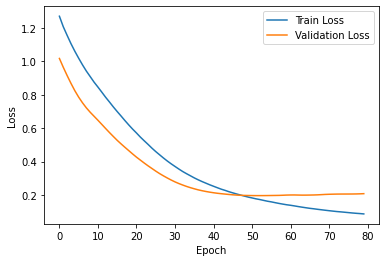

1/1 [==============================] - 0s 111ms/step
R2-score on Test set: 0.75298387
Mean Squared Error on Test Set: [0.20736047625541687, 0.39971837401390076, 0.20736047625541687, 0.7529838681221008]


INFO:tensorflow:Assets written to: ./models\assets


INFO:tensorflow:Assets written to: ./models\assets


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

DATASET_PATH = "./data.csv"

from keras import backend as K

def r2_score(y_test, y_pred):  
    SS_res =  K.sum(K.square( y_test-y_pred )) 
    SS_tot = K.sum(K.square( y_test - K.mean(y_test) ) ) 
    return (1 - SS_res/(SS_tot + K.epsilon()))
def main():
    data = pd.read_csv(DATASET_PATH)

    # for categorical data.
    data = pd.get_dummies(data, columns=['infill_pattern'])
    data = pd.get_dummies(data, columns=['material'])

    # scale numerical data.
    scaler = StandardScaler()
    numerical_features = [
        'layer_height',
        'wall_thickness',
        'infill_density',
        'nozzle_temperature',
        'bed_temperature',
        'print_speed',
        'fan_speed',
        'roughness',
        'tension_strenght',
        'elongation',
    ]
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    X = data.drop(columns=['roughness', 'tension_strenght', 'elongation'])
    X = X.astype('float32')
    y = data[['roughness', 'tension_strenght', 'elongation',]]

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

    num_features = 11

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(num_features,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='linear'),
    ])
    

    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'mse', r2_score])

    history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))
    # Access training and validation loss values from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Assuming you have matplotlib installed for visualization

    # Plot training and validation loss over epochs
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    loss = model.evaluate(X_test, y_test)
    pred= model.predict(X_test)
    print("R2-score on Test set:", K.get_value(r2_score(K.constant(y_test),pred)))
    print("Mean Squared Error on Test Set:", loss)

    model.save("./models")


if __name__ == "__main__":
    main()